In [42]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Fraud Detection Transactions Dataset.csv")

# Show basic structure
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset Shape: (50000, 21)
Columns: ['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type', 'Timestamp', 'Account_Balance', 'Device_Type', 'Location', 'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age', 'Transaction_Distance', 'Authentication_Method', 'Risk_Score', 'Is_Weekend', 'Fraud_Label']


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,14-08-2023 19:30,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,07-06-2023 04:01,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,20-06-2023 15:25,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,07-12-2023 00:31,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,11-11-2023 23:44,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [43]:
# Drop irrelevant or unnecessary columns
columns_to_drop = [
    'Transaction_ID', 'User_ID', 'Timestamp', 
    'IP_Address_Flag', 'Card_Type', 'Card_Age',
    'Transaction_Distance', 'Risk_Score', 'Is_Weekend' , 'Location'
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm new structure
print("Remaining Columns:", df.columns.tolist())
df

Remaining Columns: ['Transaction_Amount', 'Transaction_Type', 'Account_Balance', 'Device_Type', 'Merchant_Category', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Authentication_Method', 'Fraud_Label']


,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Authentication_Method,Fraud_Label
0,39.79,POS,93213.17,Laptop,Travel,0,7,437.63,3,Biometric,0
1,1.19,Bank Transfer,75725.25,Mobile,Clothing,0,13,478.76,4,Password,1
2,28.96,Online,1588.96,Tablet,Restaurants,0,14,50.01,4,Biometric,1
3,254.32,ATM Withdrawal,76807.20,Tablet,Clothing,0,8,182.48,4,OTP,1
4,31.28,POS,92354.66,Mobile,Electronics,1,14,328.69,4,Password,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Clothing,0,2,389.00,3,PIN,0
49996,126.15,POS,28791.75,Mobile,Clothing,0,13,434.95,4,Biometric,1
49997,72.02,Online,29916.41,Laptop,Clothing,1,1,369.15,2,Biometric,0
49998,64.89,Bank Transfer,67895.67,Mobile,Electronics,0,13,242.29,4,Biometric,1


In [44]:
# Check for missing values
df.isnull().sum()

Transaction_Amount              0
Transaction_Type                0
Account_Balance                 0
Device_Type                     0
Merchant_Category               0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Authentication_Method           0
Fraud_Label                     0
dtype: int64

In [45]:
## Duplicate records
df[df.duplicated()]

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Authentication_Method,Fraud_Label


In [46]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid modifying original
df_encoded = df.copy()

# Categorical columns to label encode
categorical_cols = ['Transaction_Type', 'Device_Type', 'Merchant_Category', 'Authentication_Method']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("Simple label encoding done. Data shape:", df_encoded.shape)
df_encoded

Simple label encoding done. Data shape: (50000, 11)


,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Authentication_Method,Fraud_Label
0,39.79,3,93213.17,0,4,0,7,437.63,3,0,0
1,1.19,1,75725.25,1,0,0,13,478.76,4,3,1
2,28.96,2,1588.96,2,3,0,14,50.01,4,0,1
3,254.32,0,76807.20,2,0,0,8,182.48,4,1,1
4,31.28,3,92354.66,1,1,1,14,328.69,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,2,76960.11,1,0,0,2,389.00,3,2,0
49996,126.15,3,28791.75,1,0,0,13,434.95,4,0,1
49997,72.02,2,29916.41,0,0,1,1,369.15,2,0,0
49998,64.89,1,67895.67,1,1,0,13,242.29,4,0,1


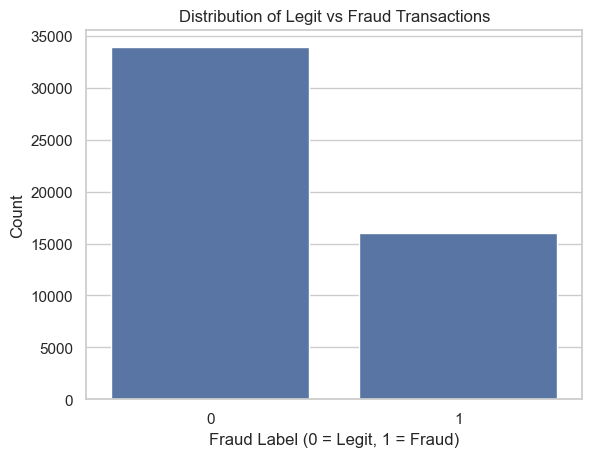

Fraud_Label
0    33933
1    16067
Name: count, dtype: int64


In [47]:
# Check distribution of target class
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Fraud_Label', data=df)
plt.title("Distribution of Legit vs Fraud Transactions")
plt.xlabel("Fraud Label (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# print exact counts
print(df['Fraud_Label'].value_counts())

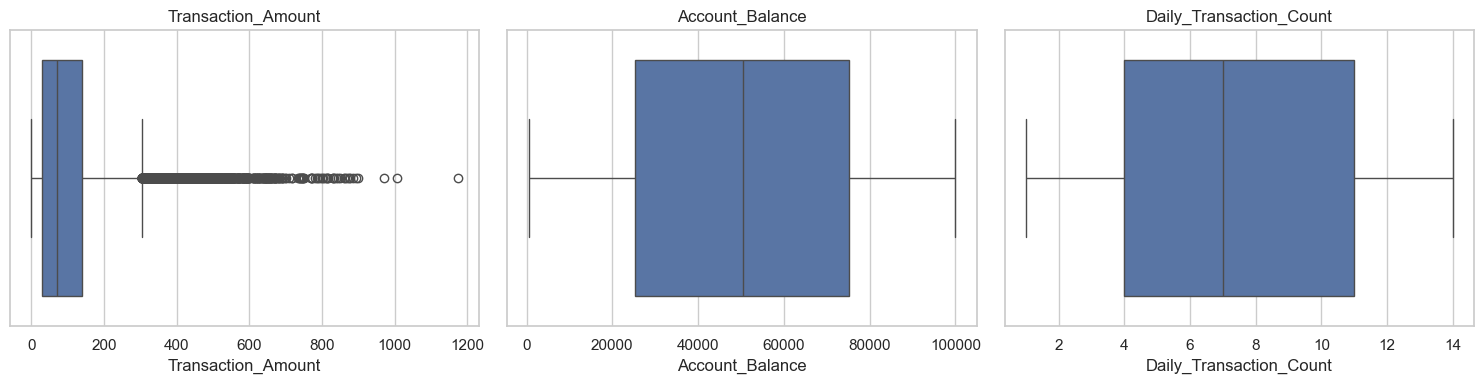

Saved: plots/box_row1.png


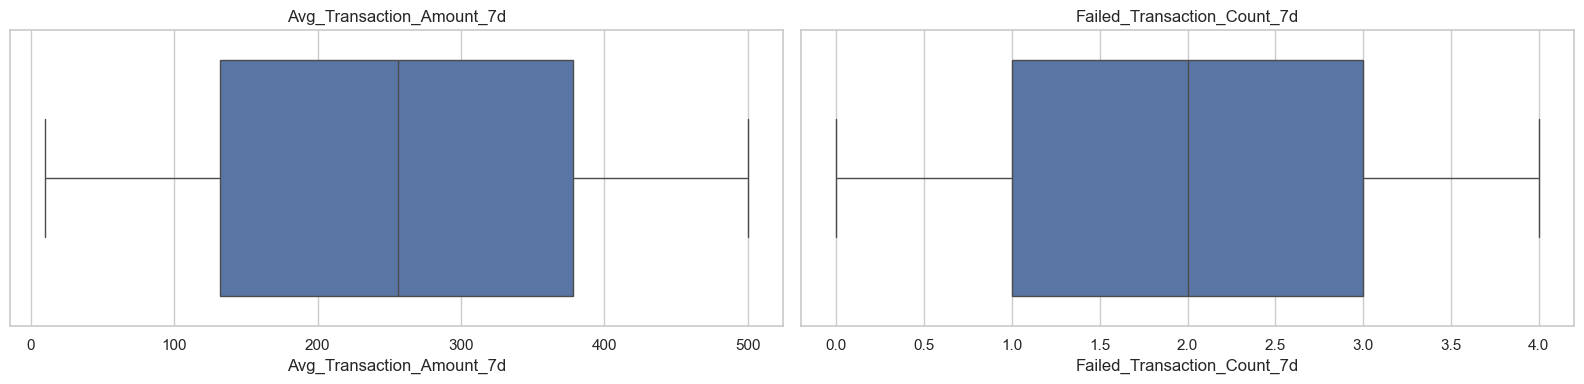

Saved: plots/box_row2.png


In [48]:
# Boxplots
import matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid")

features = [c for c in ["Transaction_Amount","Account_Balance","Daily_Transaction_Count",
                        "Avg_Transaction_Amount_7d","Failed_Transaction_Count_7d"] if c in df.columns]
r1 = features[:3]
r2 = features[3:]

fig, axes = plt.subplots(1, len(r1), figsize=(15,4))
for ax, col in zip(axes, r1):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.savefig("plots/box_row1.png")
plt.show()
print("Saved: plots/box_row1.png")

if r2:
    fig, axes = plt.subplots(1, len(r2), figsize=(8*len(r2),4))
    if len(r2) == 1: axes = [axes]
    for ax, col in zip(axes, r2):
        sns.boxplot(x=df[col], ax=ax)
        ax.set_title(col)
    plt.tight_layout()
    plt.savefig("plots/box_row2.png")
    plt.show()
    print("Saved: plots/box_row2.png")


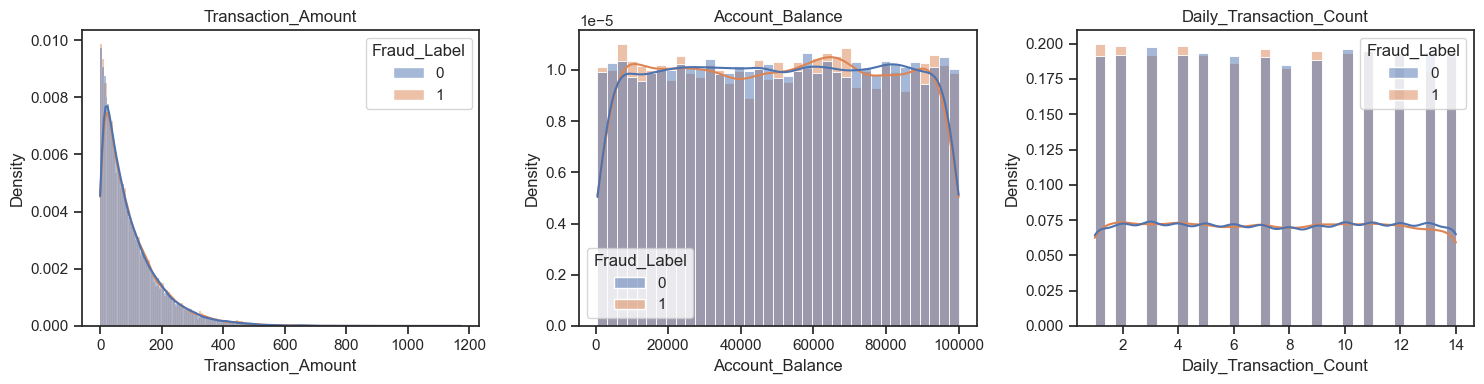

Saved: plots/dist_row1.png


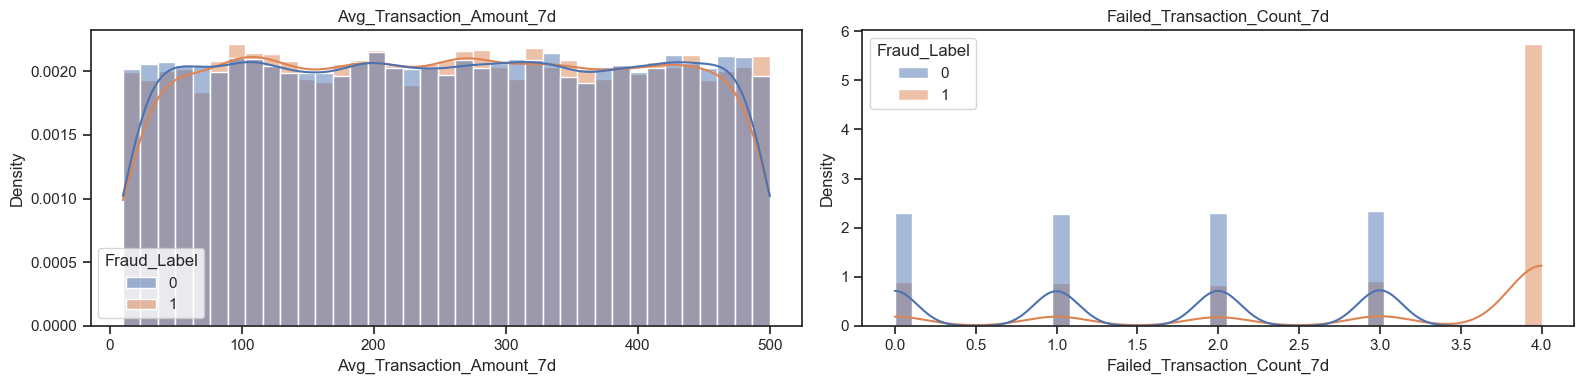

Saved: plots/dist_row2.png


In [49]:

# Distribution plots by class
import matplotlib.pyplot as plt, seaborn as sns
sns.set(style="ticks")

hue = "Fraud_Label"
if hue not in df.columns:
    raise ValueError("Fraud_Label missing in df — distributions need class labels.")

# first row
fig, axes = plt.subplots(1, min(3, len(features)), figsize=(15,4))
for ax, col in zip(axes, features[:3]):
    sns.histplot(data=df, x=col, hue=hue, kde=True, stat="density", common_norm=False, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.savefig("plots/dist_row1.png")
plt.show()
print("Saved: plots/dist_row1.png")

# second row if any
if len(features) > 3:
    fig, axes = plt.subplots(1, len(features[3:]), figsize=(8*len(features[3:]),4))
    if len(features[3:]) == 1: axes = [axes]
    for ax, col in zip(axes, features[3:]):
        sns.histplot(data=df, x=col, hue=hue, kde=True, stat="density", common_norm=False, ax=ax)
        ax.set_title(col)
    plt.tight_layout()
    plt.savefig("plots/dist_row2.png")
    plt.show()
    print("Saved: plots/dist_row2.png")


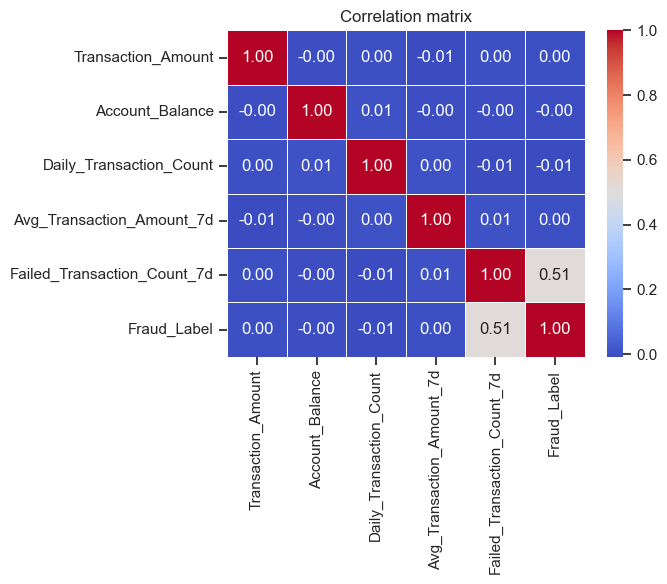

Saved: plots/corr_heatmap.png


In [50]:

# Correlation heatmap
import os, seaborn as sns, matplotlib.pyplot as plt
os.makedirs("plots", exist_ok=True)

num_cols = ["Transaction_Amount","Account_Balance","Daily_Transaction_Count",
            "Avg_Transaction_Amount_7d","Failed_Transaction_Count_7d"]
cols = [c for c in num_cols if c in df.columns] + (["Fraud_Label"] if "Fraud_Label" in df.columns else [])
corr = df[cols].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.4)
plt.title("Correlation matrix")
plt.tight_layout()
plt.savefig("plots/corr_heatmap.png")
plt.show()
print("Saved: plots/corr_heatmap.png")

In [51]:
from sklearn.model_selection import train_test_split

# Separate features and target
x = df_encoded.drop('Fraud_Label', axis=1)
y = df_encoded['Fraud_Label']

# Split data: 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (40000, 10)
Y_train shape: (40000,)
X_test shape: (10000, 10)
Y_test shape: (10000,)


In [52]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

print("Data scaled and balanced.")
print(f"Training samples after SMOTE: {x_train_balanced.shape[0]}")
print(f"Original test samples (untouched): {x_test_scaled.shape[0]}")

Data scaled and balanced.
Training samples after SMOTE: 54336
Original test samples (untouched): 10000


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),   
}

f1_scores = []
predictions = {}

# Train and evaluate
for name, model in models.items():
    model.fit(x_train_balanced, y_train_balanced)
    preds = model.predict(x_test_scaled)
    predictions[name] = preds
    score = f1_score(y_test, preds)
    f1_scores.append(score)
    print(f"\n {name} Report:\n")
    print(classification_report(y_test, preds))

# F1 Score Comparison
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    "Model": list(models.keys()),
    "F1-Score": f1_scores
}).sort_values(by="F1-Score", ascending=False)


 Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      6765
           1       0.57      0.73      0.64      3235

    accuracy                           0.74     10000
   macro avg       0.71      0.73      0.72     10000
weighted avg       0.76      0.74      0.74     10000


 KNN Report:

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      6765
           1       0.57      0.69      0.63      3235

    accuracy                           0.73     10000
   macro avg       0.71      0.72      0.71     10000
weighted avg       0.75      0.73      0.74     10000


 Decision Tree Report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      6765
           1       0.64      0.69      0.66      3235

    accuracy                           0.77     10000
   macro avg       0.74      0.75      0.75     10000
wei

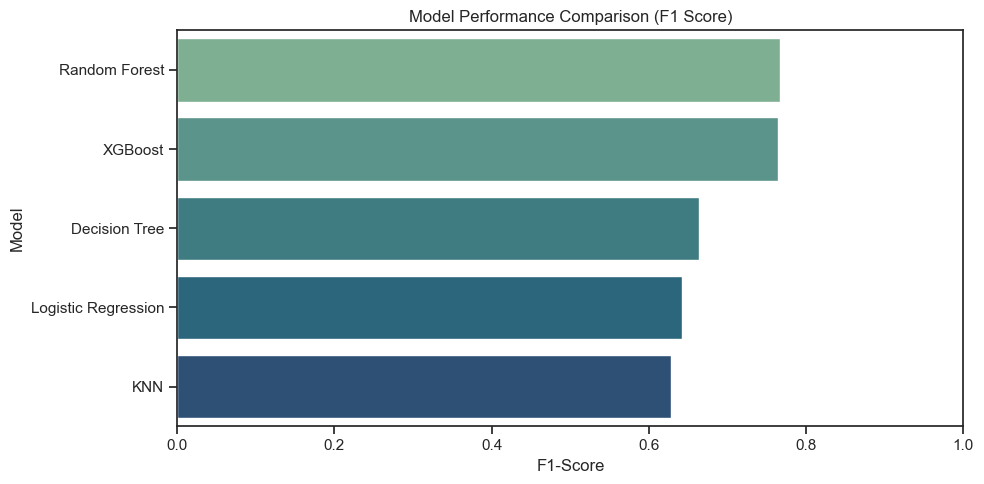

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(x="F1-Score", y="Model", data=results_df,hue="Model", palette="crest")
plt.title("Model Performance Comparison (F1 Score)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(x_train_balanced, y_train_balanced)

best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Params:", xgb_grid.best_params_)

# Evaluate on test data
xgb_preds = best_xgb.predict(x_test_scaled)
print("\nTuned XGBoost Report:\n")
print(classification_report(y_test, xgb_preds))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Tuned XGBoost Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6765
           1       1.00      0.62      0.77      3235

    accuracy                           0.88     10000
   macro avg       0.92      0.81      0.84     10000
weighted avg       0.90      0.88      0.87     10000



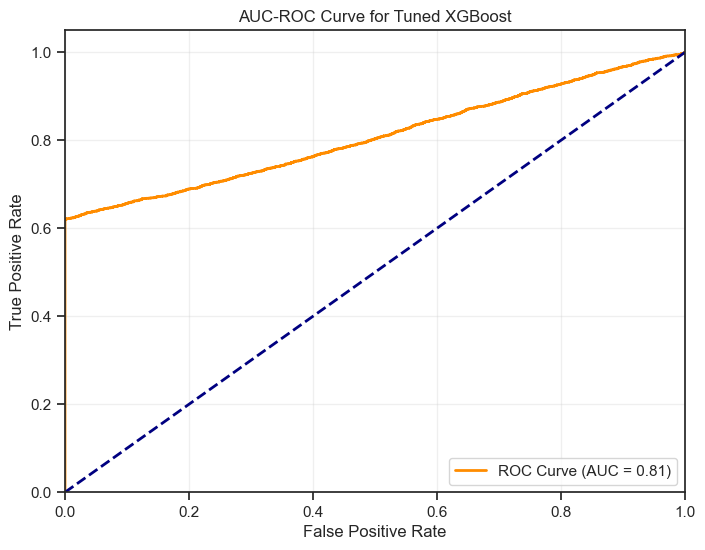

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (fraud)
y_probs = best_xgb.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Tuned XGBoost')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


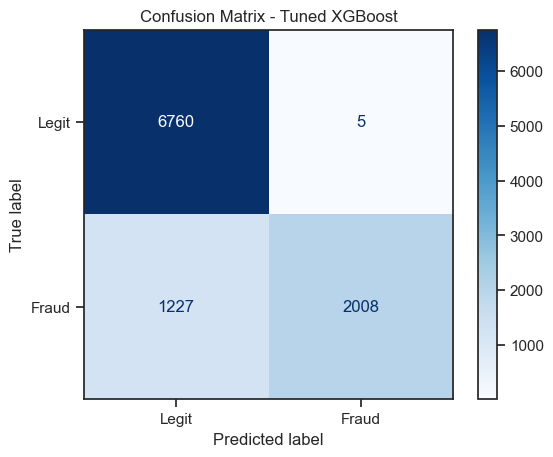

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
final_preds = best_xgb.predict(x_test_scaled)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, final_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.grid(False)
plt.show()


In [58]:
import pickle

# Save the tuned XGBoost model
with open("fraud_xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

# Save the scaler used for feature scaling
with open("fraud_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [59]:
import pickle
import numpy as np

# Load model and scaler
with open("fraud_xgb_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("fraud_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

In [60]:
import pandas as pd

# Define feature names
columns = [
    "Transaction_Amount", "Transaction_Type", "Account_Balance", "Device_Type",
    "Merchant_Category", "Previous_Fraudulent_Activity", "Daily_Transaction_Count",
    "Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d", "Authentication_Method"
]

# Input as a DataFrame with proper feature names
input_data = pd.DataFrame([[39.79, 3, 93213.17, 0, 4, 0, 7, 437.63, 3, 0]], columns=columns)

# Scale and predict
input_scaled = scaler.transform(input_data)
prediction = model.predict(input_scaled)

print("Prediction:", "FRAUD" if prediction[0] == 1 else "LEGIT")


Prediction: LEGIT
